In [ ]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])
print(len(perch_length))
print(len(perch_weight))

56
56


In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
#knr = KNeighborsRegressor() #훈련데이터 < 테스트 데이터 = 과소적합
knr = KNeighborsRegressor(n_neighbors=3) #이웃의 수를 조절함으로써 데이터 조절, 이웃을 줄일수록 세심하게 학습 가능
knr.fit(train_input,train_target)
print(knr.score(train_input,train_target))
print(knr.score(test_input,test_target))

0.9804899950518966
0.9746459963987609


In [ ]:
from sklearn.metrics import mean_absolute_error #절대값
from sklearn.metrics import mean_squared_error #제곱

self_prediction = knr.predict(train_input)
test_prediction = knr.predict(test_input)
mae_self = mean_absolute_error(train_target,self_prediction)
mae = mean_absolute_error(test_target,test_prediction)
print(mae_self,mae)

29.674603174603167 35.42380952380951


In [ ]:
print(knr.predict([[50]]))
print(knr.predict([[100]]))
print(knr.predict(([[150]])))

[1033.33333333]
[1033.33333333]
[1033.33333333]


In [ ]:
#선형회귀
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input,train_target)
print(lr.score(train_input,train_target)) #과대적합
print(lr.score(test_input,test_target))

0.939846333997604
0.8247503123313558


In [ ]:
print(lr.predict([[50]]))
print(lr.predict([[100]]))
print(lr.predict(([[150]])))
print(lr.predict([[10]])) #선형회귀의 한계

[1241.83860323]
[3192.69585141]
[5143.55309959]
[-318.84719532]


In [ ]:
#선형회귀를 통해 획득한 값: y = ax + b에서 a(coef_)와 b(intercept_)
print(lr.coef_,lr.intercept_)
print(lr.coef_*100+lr.intercept_)

[39.01714496] -709.0186449535477
[3192.69585141]


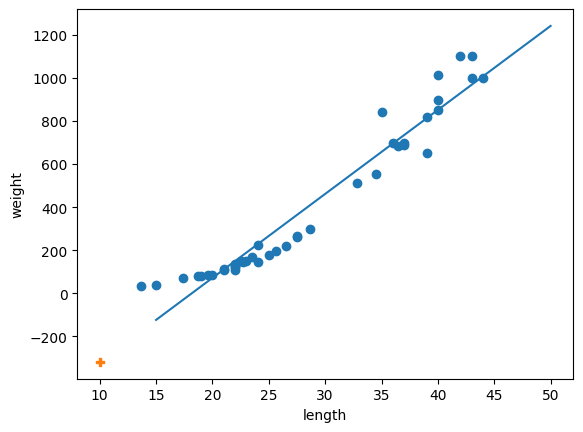

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_input, train_target)
plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])
plt.scatter(10,10*lr.coef_+lr.intercept_, marker='P')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
#단항 선형회귀의 한계를 개선 => 최적의 곡선을 찾기 위한 다항회귀
#다항회귀: y = ax2 + ax + b
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input**2,test_input))
print(train_poly.shape, test_poly.shape)
print(train_poly[:5])
print(test_poly[:5])

(42, 2) (14, 2)
[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]]
[[ 70.56   8.4 ]
 [324.    18.  ]
 [756.25  27.5 ]
 [453.69  21.3 ]
 [506.25  22.5 ]]


In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.9706807451768623
0.9775935108325122


In [ ]:
print(lr.predict([[50**2,50]]))
print(lr.predict([[100**2, 100]]))
print(lr.predict([[150**2, 150]]))
print(lr.predict([[10**2,10]])) #단항 선형회귀의 한계를 해결

[1573.98423528]
[8103.57880667]
[19704.83392493]
[1.90417193]


In [ ]:
#다항회귀의 계수와 절편
print(lr.coef_,lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


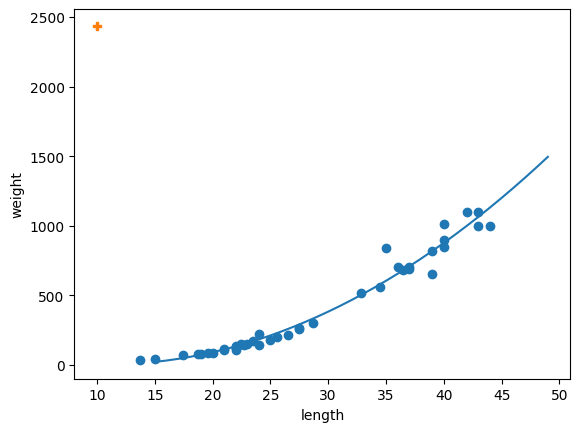

In [ ]:
point = np.arange(15,50)
plt.scatter(train_input,train_target)
plt.plot(point,lr.coef_[0]*(point**2)+lr.coef_[1]*point+lr.intercept_)
plt.scatter(10,lr.coef_[0]*50**2+ lr.coef_[1]*10+lr.intercept_,marker='P')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()